In [1]:
%pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

     |████████████████████████████████| 292 kB 17.0 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading dataset.

def load_dataset():
    df = pd.read_csv('googleplaystore.csv')
    return df


apps_dataset = load_dataset()

In [3]:
# Make summarize to our dataset.

def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())


print_summarize_dataset(apps_dataset)

Dataset dimension:
(10841, 13)
First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0  

In [4]:
# Let's get more information.

apps_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Check dataset for missing(NaN) values.

apps_dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# Let's clean our dataset (data pre-processing).

def clean_dataset(dataset):
    # Let's drop NaN rows from 'Content Rating' col. and fill NaN values in 'Type' col. with 'Free'.
    dataset['Type'].fillna("Free", inplace = True)
    dataset.dropna(subset=['Content Rating'], inplace=True)
    
    # Drop unnecessary columns.
    dataset.drop(columns=['Last Updated', 'Current Ver', 'Android Ver'], inplace=True)

    # Replace NaN values in 'Rating' col. with Mode(the most frequent val) value.
    dataset['Rating'].fillna(value=dataset['Rating'].mode()[0], inplace=True)

    # Now convert the data of columns(Reviews, Size, Installs, Price) to numeric, remove non-numeric characters from rows and drop NaN values.
    dataset['Reviews'] = dataset['Reviews'].astype(int)
    
    dataset['Size'] = dataset['Size'].apply(lambda x: x.strip('+').replace(',', '').replace('M', 'e+6').replace('k', 'e+3'))
    dataset['Size'] = dataset['Size'].replace('Varies with device', np.NaN)
    
    dataset['Installs'] = dataset['Installs'].apply(lambda x: x.strip('+').replace(',', ''))

    dataset['Price'] = dataset['Price'].apply(lambda x: x.strip('$'))
    dataset[['Size', 'Installs', 'Price']] = dataset[['Size', 'Installs', 'Price']].apply(pd.to_numeric, axis = 1)
    
    return dataset.dropna(subset = ['Size'], inplace=True)


clean_dataset(apps_dataset)

In [7]:
print(apps_dataset.head(10))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

   Reviews        Size    Installs  Type  Price Content Rating  \
0      159  19000000.0     10000.0  Free    0.0      

In [8]:
# Now we can see our fresh dataset.

apps_dataset.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


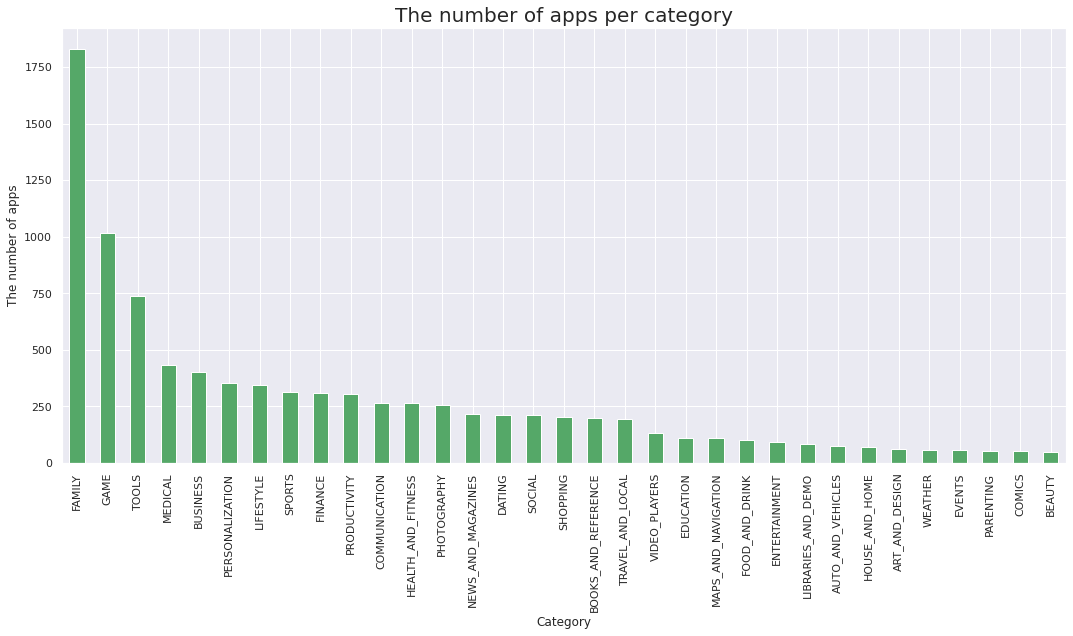

In [51]:
# Visualization of our ready dataset.

def category_with_many_apps(dataset):

    # Let's know the highest number of apps per category.
    mcat = dataset['Category'].value_counts()
    sns.set()
    plt.figure(figsize = (18, 8))
    plt.title('The number of apps per category', fontsize = 20)
    plt.ylabel('The number of apps')
    plt.xlabel('Category')
    ax = mcat.plot.bar(y='speed', rot=90, color='g')
    plt.show()


category_with_many_apps(apps_dataset)

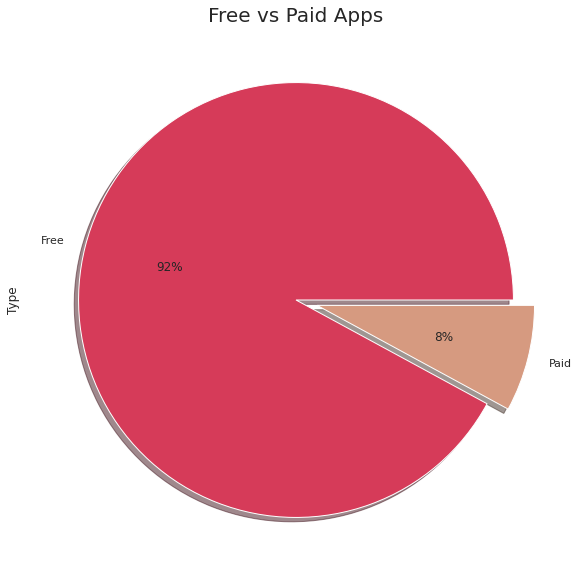

In [10]:
def free_and_paid(dataset):

    # Plot free and paid apps
    free_vs_paid = apps_dataset['Type'].value_counts()
    sns.set()
    plt.title('Free vs Paid Apps', fontsize = 20)
    free_vs_paid.plot.pie(figsize=(20, 10), explode=(0.0, 0.1), colors=["#D63B59", "#D69A80"], autopct='%.0f%%', shadow=True)
    plt.show()


free_and_paid(apps_dataset)

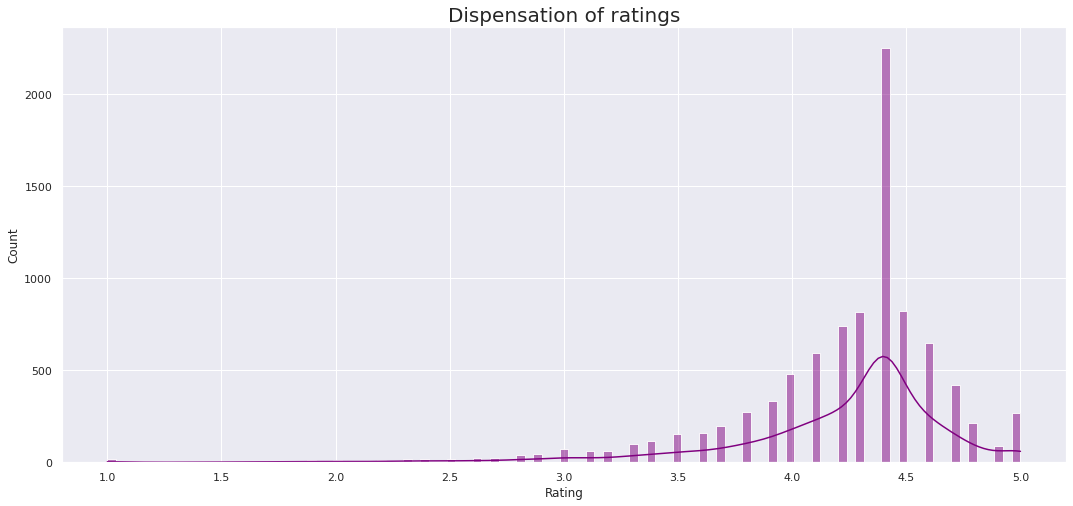

In [47]:
def freq_of_ratings(dataset):
    
    # Let's plot the frequency of ratings
    plt.figure(figsize = (18, 8))
    plt.title('Dispensation of ratings', fontsize=20)
    sns.histplot(data=dataset, x="Rating", kde=True, color= "purple")
    plt.show()
    
    
freq_of_ratings(apps_dataset)

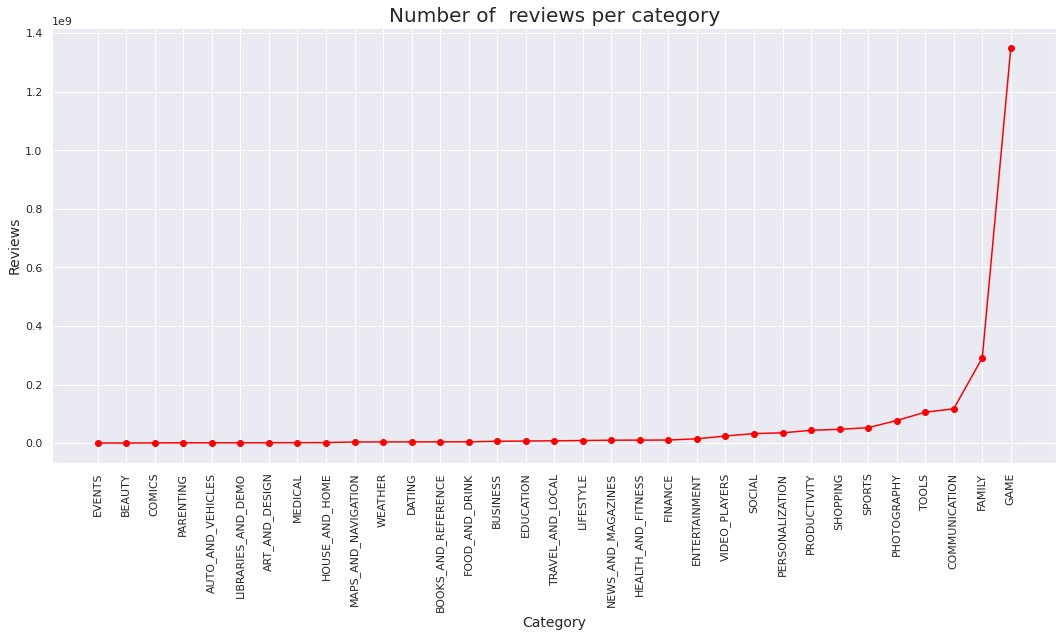

In [11]:
def reviews_categ(dataset):
    
    # Plot the reviews in every category
    rev = dataset.groupby('Category')[['Reviews']].sum().sort_values(by='Reviews', ascending=True)
    cat = []
    r = []
    for i in range(len(rev)):
        cat.append(rev.Reviews[i])
        r.append(rev.index[i])
    plt.figure(figsize = (18, 8))
    plt.plot(r, cat, color='red', marker='o')
    plt.title('Number of  reviews per category', fontsize=20)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Reviews', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


reviews_categ(apps_dataset)

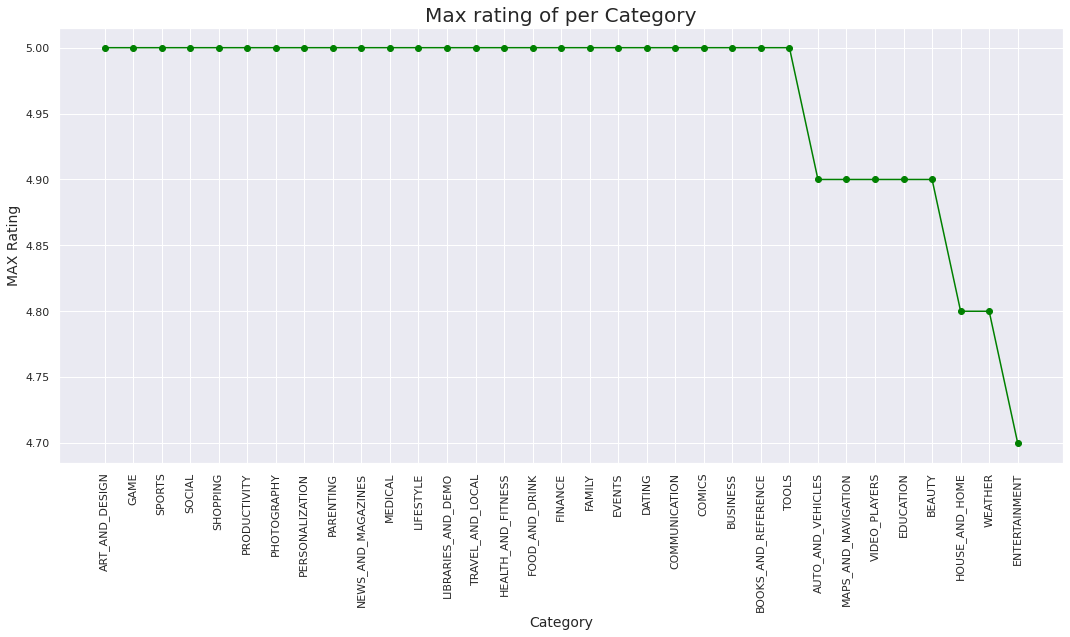

In [48]:
def max_rating(dataset):

    # Let's see max rating in every category of apps
    rev = apps_dataset.groupby('Category')[['Rating']].max().sort_values(by='Rating', ascending=False)
    cat = []
    rat = []
    for i in range(len(rev)):
        cat.append(rev.Rating[i])
        rat.append(rev.index[i])
    plt.figure(figsize = (18, 8))
    plt.plot(rat, cat, color='green', marker='o')
    plt.title('Max rating of per Category', fontsize=20)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('MAX Rating', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


max_rating(apps_dataset)

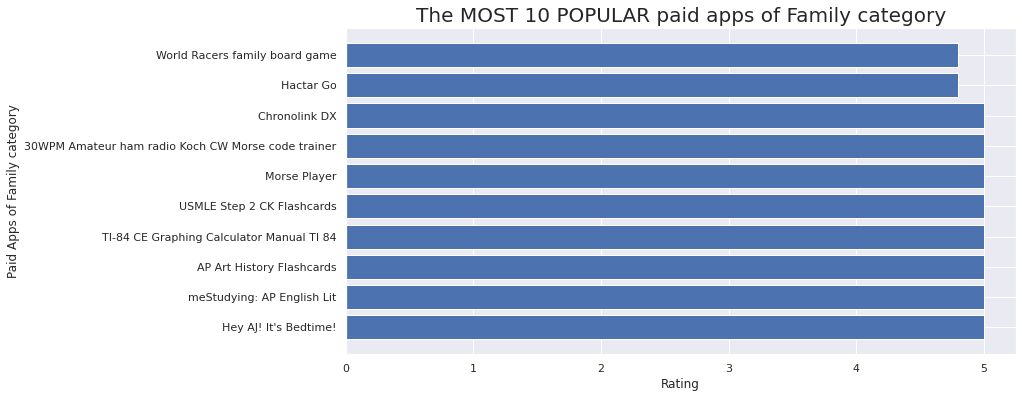

In [13]:
def print_histograms(dataset):

    # Plot with bar diagram the most populars paid apps of Family category.
    most_popular_pfa = dict(dataset.loc[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid'), ['App', 'Rating']].nlargest(10, 'Rating').values)
    apps = list(most_popular_pfa.keys())
    rating = list(most_popular_pfa.values())
    fig = plt.figure(figsize = (12, 6))
    plt.barh(apps,rating)
    plt.title('The MOST 10 POPULAR paid apps of Family category', fontsize = 20)
    plt.ylabel('Paid Apps of Family category')
    plt.xlabel('Rating')
    plt.show()


print_histograms(apps_dataset)

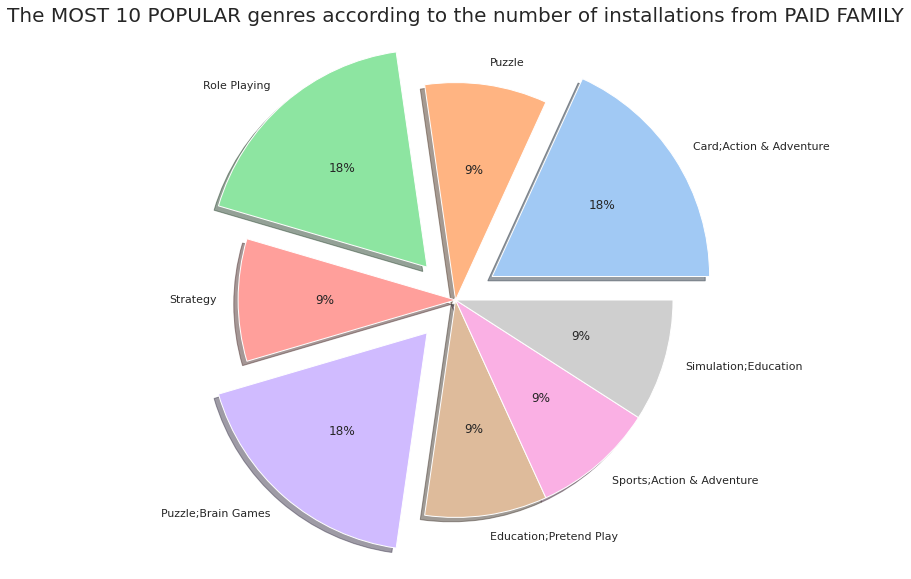

In [14]:
def most_pop_genres_inst_pf(dataset):

    # Plot with a pie diagram the most popular genres according to the number of installations from paid family
    most_popular_gen = dict(dataset.loc[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid'), ['Genres', 'Installs']].nlargest(10, 'Installs').values)
    genres = list(most_popular_gen.keys())
    installs = list(most_popular_gen.values())
    colors = sns.color_palette('pastel')[0:len(genres)]
    fig = plt.figure(figsize = (15, 10))
    explode = (0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0)
    plt.title('The MOST 10 POPULAR genres according to the number of installations from PAID FAMILY', fontsize = 20)
    plt.pie(installs, labels = genres, colors = colors, explode=explode, shadow=True, autopct='%.0f%%')
    plt.show()


most_pop_genres_inst_pf(apps_dataset)

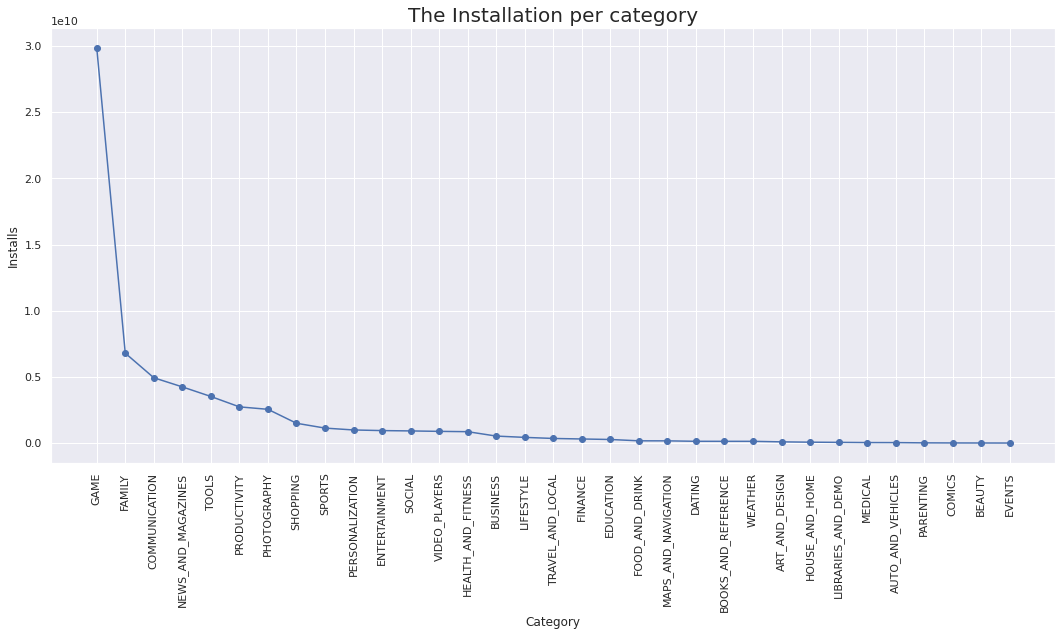

In [15]:
def array_of_inst(dataset):

    # Array of installations per category.  
    highest_Installs_df = dataset.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
    cat = []
    ins = []
    for i in range(len(highest_Installs_df)):
        cat.append(highest_Installs_df.Installs[i])
        ins.append(highest_Installs_df.index[i])
    plt.figure(figsize=(18, 8))
    plt.xlabel("Category")
    plt.ylabel("Installs")
    plt.xticks(rotation=90)
    plt.title('The Installation per category', fontsize = 20)
    plt.plot(ins, cat, marker='o')
    plt.show()


array_of_inst(apps_dataset)

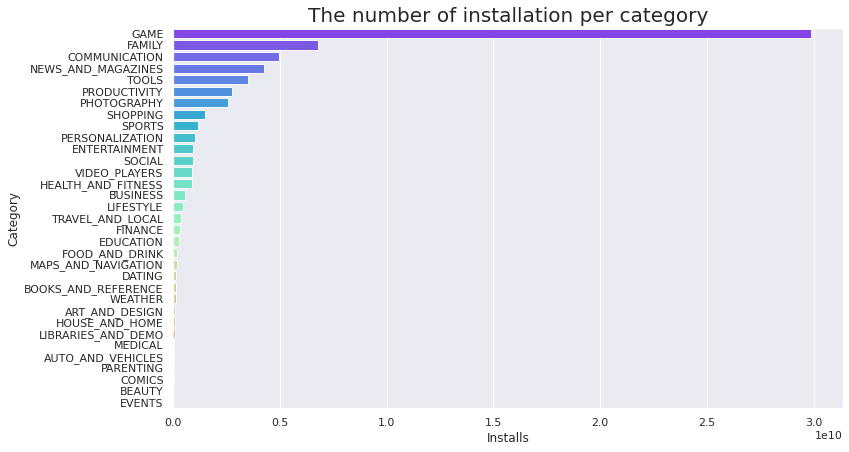

In [33]:
def installations_of_per_category(dataset):

    # PLot with bar chart the number of installation per category
    highest_Installs_df = dataset.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
    inst = []
    categ = []
    for i in range(len(highest_Installs_df)):
        inst.append(highest_Installs_df.Installs[i])
        categ.append(highest_Installs_df.index[i])
    plt.figure(figsize=(12,7))
    plt.xlabel("Installs")
    plt.ylabel("Category")
    graph = sns.barplot(x = inst, y = categ, alpha =0.9, palette= "rainbow")
    graph.set_title("The number of installation per category", fontsize = 20)

    


installations_of_per_category(apps_dataset)

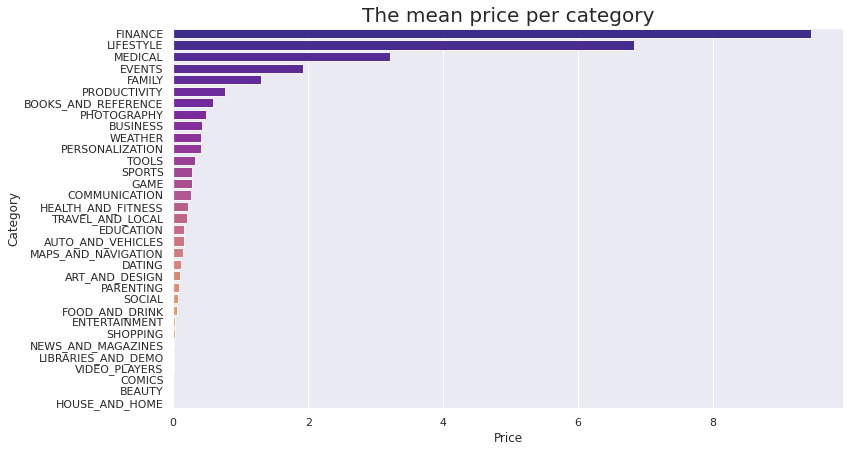

In [41]:
def mean_price_per_categ(dataset):

    # Plot a bar with the mean price per category
    mean_pr_categ = dataset.groupby('Category')[['Price']].mean().sort_values(by='Price', ascending=False)
    price = []
    categ = []
    for i in range(len(mean_pr_categ)):
        price.append(mean_pr_categ.Price[i])
        categ.append(mean_pr_categ.index[i])
    plt.figure(figsize=(12,7))
    plt.xlabel("Price")
    plt.ylabel("Category")
    graph = sns.barplot(x = price, y = categ, alpha =0.9, palette= "plasma")
    graph.set_title("The mean price per category", fontsize = 20) 


mean_price_per_categ(apps_dataset)

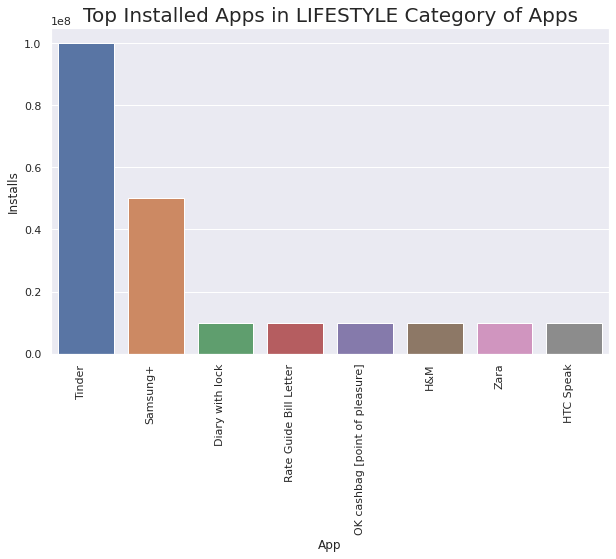

In [18]:
def top_apps_percateg(str):
    
    # Let's find top apps in chosen category
    str = str.upper()
    top10 = apps_dataset[apps_dataset['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(10,6))
    plt.title('Top Installed Apps in ' + str + ' Category of Apps', size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 90, horizontalalignment='right')
    

top_apps_percateg('Lifestyle')

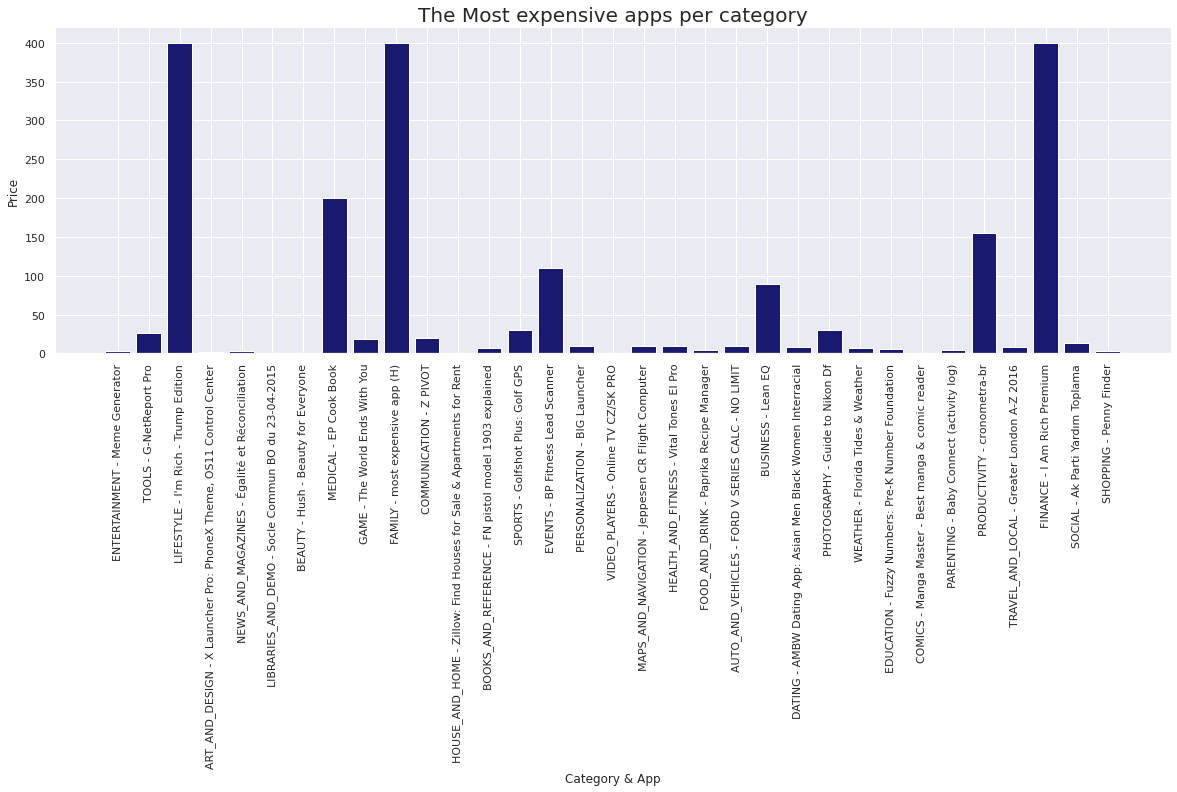

In [19]:
def most_exp_apps_percateg(dataset):

    # Plot The Most expensive apps per category
    most_exp_apps = []
    for i in list(set(dataset['Category'])):
        most_exp_apps.append(dict(dataset.loc[(dataset['Category'] == i) & ((dataset['Type'] == 'Paid') | (dataset['Type'] == 'Free')), ['App', 'Price']].nlargest(1, 'Price').values))
    
    for i in most_exp_apps:
        most_exp_apps[0].update(i)
    mexp = most_exp_apps[0]
    j = pd.DataFrame(mexp.items(), columns=['App', 'Price'])
    j['Category'] = list(set(dataset['Category']))
    j['Catgory and Apps'] = j['Category'].astype(str) +" - "+ j["App"]
    j.drop(['Category', 'App'], inplace=True, axis=1)
    df = j[['Catgory and Apps', 'Price']]
    sns.set()
    plt.figure(figsize=(20,6)) 
    plt.bar(x=df['Catgory and Apps'], 
        height=df['Price'], 
        color='midnightblue') 
    plt.ylabel("Price")
    plt.xlabel("Category & App")
    plt.xticks(rotation=90)
    plt.title('The Most expensive apps per category', fontsize = 20)


most_exp_apps_percateg(apps_dataset)

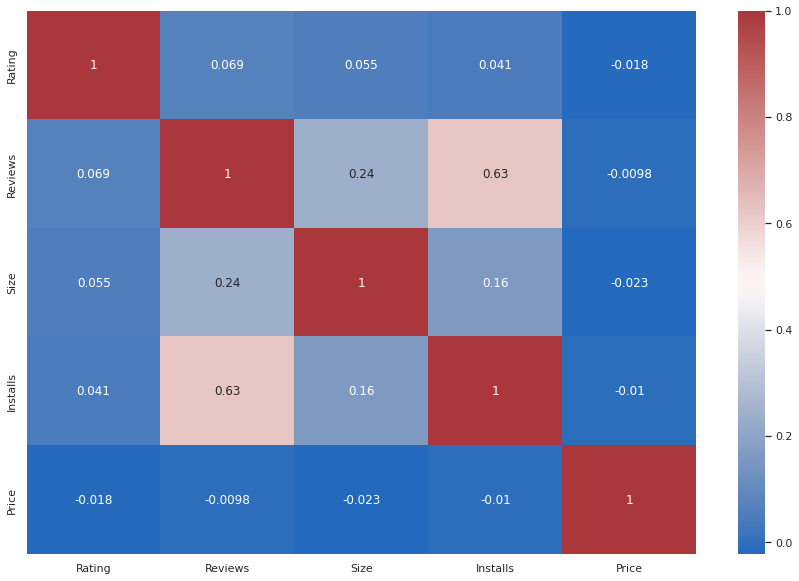

In [20]:
def compute_correlations_matrix(dataset):

    # Plot correlation of our dataset
    corrMatrix = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(corrMatrix, annot=True, cmap='vlag')
    plt.show()


compute_correlations_matrix(apps_dataset)

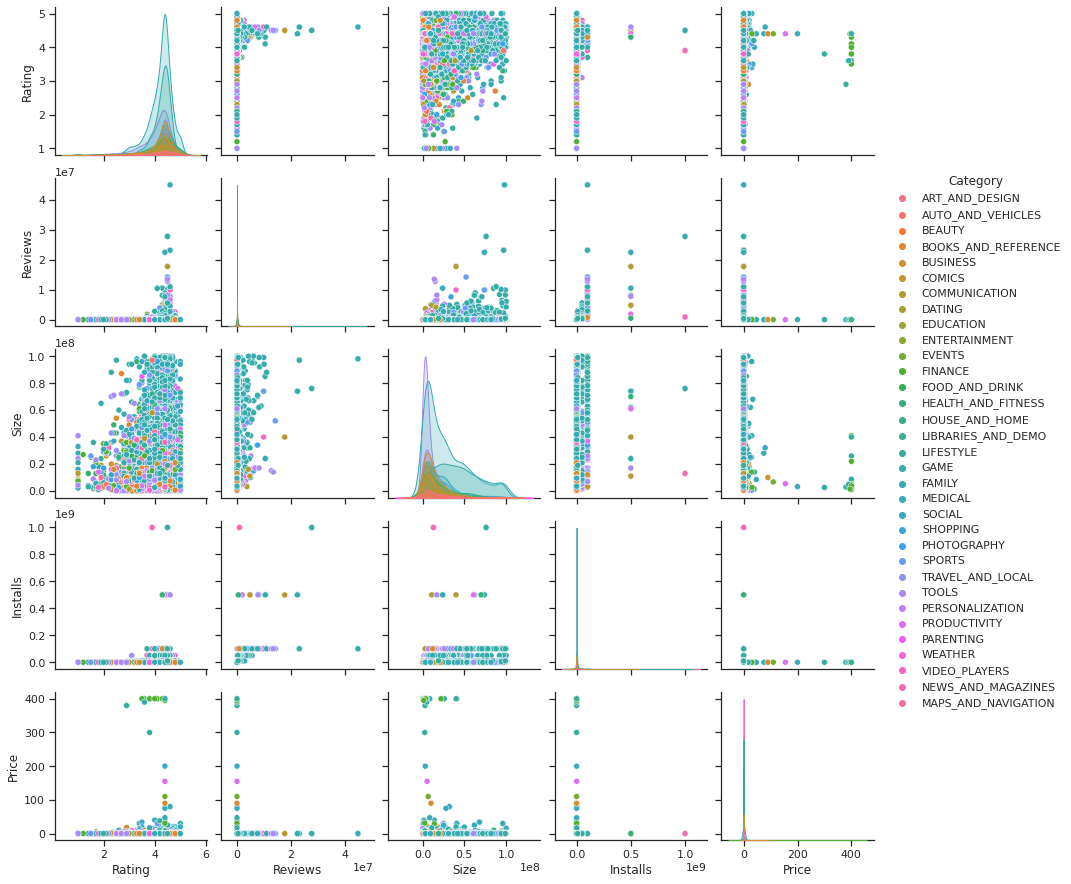

In [32]:
def print_scatter_matrix():
    sns.set()
    sns.set_theme(style="ticks")
    sns.pairplot(apps_dataset, hue="Category")
    plt.show()


print_scatter_matrix()